In [1]:
using ReinforcementLearningAnIntroduction

In [2]:
using Plots

In [3]:
env = AccessControlEnv()
nstates = length(get_observation_space(env))
nactions = length(get_action_space(env))
agent = Agent(
    policy=QBasedPolicy(
        learner=DifferentialTDLearner(
            approximator=TabularApproximator(n_state=nstates, n_action=nactions),
            α=0.01,
            β=0.01,
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory=EpisodicCompactSARTSATrajectory()
)

Agent{QBasedPolicy{DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}},EpsilonGreedyExplorer{:linear,false,Random.MersenneTwister}},EpisodicCompactSARTSATrajectory{Tuple{Int64,Int64,Float32,Bool,Int64,Int64},Tuple{Array{Float32,1},Array{Bool,1},Array{Int64,1},Array{Int64,1}}},ReinforcementLearningBase.DefaultPlayer}(QBasedPolicy{DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}},EpsilonGreedyExplorer{:linear,false,Random.MersenneTwister}}(DifferentialTDLearner{TabularApproximator{2,Array{Float64,2}}}(TabularApproximator{2,Array{Float64,2}}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]), 0.01, 0.01, 0.0, 0), EpsilonGreedyExplorer{:linear,false,Random.MersenneTwister}(0.1, 1.0, 0, 0, 1, Random.MersenneTwister(UInt32[0x18e6923b, 0x1423e0bb, 0xed5cb620, 0x200471d7], Random.DSFMT.DSFMT_state(Int32[1066631840, 1073270803, 392812027, 1072842938, -265406330, 1073704675, -1651941256, 1073738140, 404002557, 1073266405  …  -497468239, 1073712303, -1742105735, 1073022714, 124948582

In [4]:
run(agent, env, StopAfterStep(2*10^6; is_show_progress=false))

EmptyHook()

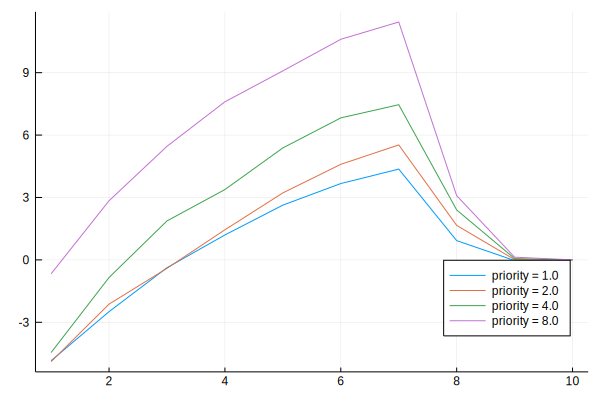

In [5]:
p = plot(legend=:bottomright)
for i in 1:length(AccessControl.PRIORITIES)
    plot!(
        [agent.policy.learner.approximator(AccessControl.TRANSFORMER[(CartesianIndex(n+1, i))]) |> maximum
            for n in 1:AccessControl.N_SERVERS],
        label="priority = $(AccessControl.PRIORITIES[i])")
end
p